In [54]:
import itertools
from math import factorial
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [25]:
stored_calcs = dict()

In [28]:
def number_of_paths(target, upper_jump__limit):
    try:
        return stored_calcs[(target, upper_jump__limit)]
    except KeyError:
        total = 0
        options = tuple(range(1, upper_jump__limit+1))
        combos = list(itertools.combinations_with_replacement(options, target))
        for c in combos:
            cs = np.cumsum(c)
            if target in cs:
                i = np.where(cs==target)[0][0]
                sequence = c[:i+1]
                numerator = factorial(len(sequence))
                denom = 1
                for num, cnt in Counter(sequence).items():
                    f = factorial(cnt)
                    denom *= f
                inc = int(numerator/denom)
                total+=inc

        stored_calcs[(target, upper_jump__limit)] = total
        return total

In [61]:
target = 20
upper_jump__limit = 2

number_of_paths(target, upper_jump__limit)

10946

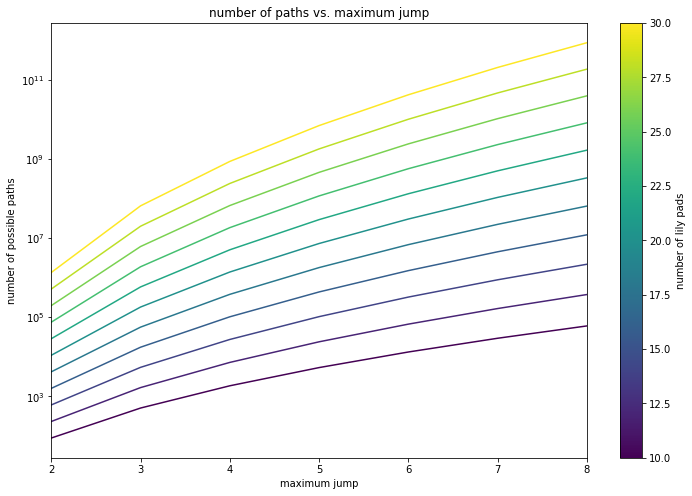

In [68]:
limits = [2, 3, 4, 5, 6, 7, 8]
targets = list(map(int, np.arange(10, 32, 2)))

normalize = mcolors.Normalize(vmin=min(targets), vmax=max(targets))
colormap = cm.viridis

fig, ax = plt.subplots(figsize=(12,8))

for target in targets:
    ax.semilogy(limits, [number_of_paths(target, u) for u in limits], color=colormap(normalize(target)), label=target)

ax.set_xlabel("maximum jump")
ax.set_ylabel("number of possible paths")
ax.set_title("number of paths vs. maximum jump")
ax.set_xlim(min(limits), max(limits))
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(targets)
plt.colorbar(scalarmappaple, label='number of lily pads')
plt.show()